#### K-Nearest Neighbors on wheat dataset
* classify the wheat types

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as prep
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the data
flc = '/Users/pinqingkan/Desktop/DataScience/PythonDataScience/DAT210x-master/Module5/Datasets/'
fname = flc + 'wheat.data'
X = pd.read_csv(fname, index_col = 0)

In [3]:
X.head()

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,kama


In [4]:
# separate into labels and data & convert labels into numbers
y = X.wheat_type.as_matrix()
y2 = X.wheat_type.astype("category").cat.codes # for plotting purpose
X = X.drop(labels = 'wheat_type', axis = 1)

In [5]:
# fillup NaNs with mean values (of each feature)
X = X.fillna(X.mean(axis = 0))

In [6]:
# split the datasets into training & testing data
# random_state = 1 to ensure repeatable results; skiped in real cases
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size = 0.33, random_state = 1)

In [7]:
# train the normalizer using the training data & normalize
norm = prep.Normalizer()
norm.fit(X_train)
X_train0 = norm.transform(X_train)
X_test0 = norm.transform(X_test)

In [8]:
# train the PCA using the normalized training data & do PCA
# for visualization purpose
pca = PCA(n_components = 2, svd_solver = 'full')
pca.fit(X_train0)
Z_train = pca.transform(X_train0)
Z_test = pca.transform(X_test0)

In [9]:
# without PCA, the accuracy score is actually higher
# Z_train = X_train0
# Z_test = X_test0

In [10]:
# apply KNeighbors on training data (normalized, PCA)
for K in np.arange(9, 0, -1):
    knc = KNeighborsClassifier(n_neighbors = K)
    knc.fit(Z_train, y_train)
    # show the accuracy score
    print(knc.score(Z_test, y_test))

0.871428571429
0.842857142857
0.857142857143
0.842857142857
0.857142857143
0.842857142857
0.857142857143
0.814285714286
0.871428571429


In [11]:
K = 9
knc = KNeighborsClassifier(n_neighbors = K)
knc.fit(Z_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

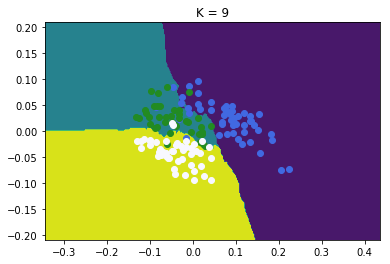

In [12]:
# plot a classified contour

# the range of the contour
xmin, xmax = Z_train[:,0].min(), Z_train[:,0].max()
ymin, ymax = Z_train[:,1].min(), Z_train[:,1].max()
x_range = xmax - xmin
y_range = ymax - ymin
padding = 0.6
xmin -= x_range * padding
ymin -= y_range * padding
xmax += x_range * padding
ymax += y_range * padding

# the grids of the contour
resolution = 0.0025
xx, yy = np.meshgrid(np.arange(xmin, xmax, resolution),
                     np.arange(ymin, ymax, resolution))

# show the classified contour
zz = knc.predict(np.c_[xx.ravel(), yy.ravel()])
zz = zz.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, zz)
colors = ['royalblue','forestgreen','ghostwhite']
for label in range(len(np.unique(y_train))):
    indices = np.where(y_train == label)
    plt.scatter(Z_train[indices,0], Z_train[indices,1], c = colors[label])
plt.title('K = ' + str(K))
plt.show()